In [1]:
import subprocess
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
urls = {
    "LiveMint": "https://www.livemint.com",
    "Business Standard": "https://www.business-standard.com",
    "Economic Times": "https://economictimes.indiatimes.com",
    "Moneycontrol": "https://www.moneycontrol.com"
}

results = []


In [3]:
for name, url in urls.items():
    out_file = f"performance/{name.lower().replace(' ', '_')}.json"
    subprocess.run([
        "npx", "lighthouse", url,
        "--output=json", f"--output-path={out_file}",
        "--only-categories=performance,seo",
        "--disable-device-emulation",
        "--disable-throttling",
        "--quiet", "--chrome-flags=--headless"
    ])

    with open(out_file) as f:
        report = json.load(f)
        performance = report['categories']['performance']['score'] * 100
        seo = report['categories']['seo']['score'] * 100
        page_size = report['audits']['total-byte-weight']['displayValue']

        # Extract timing metrics (usually in ms)
        fcp = report['audits']['first-contentful-paint']['displayValue']
        tti = report['audits']['interactive']['displayValue']
        speed_index = report['audits']['speed-index']['displayValue']
        tbt = report['audits']['total-blocking-time']['displayValue']
        cls = report['audits']['cumulative-layout-shift']['displayValue']

        results.append({
            "Site": name,
            "Performance Score": performance,
            "SEO Score": seo,
            "Page Size": page_size,
            "First Contentful Paint": fcp,
            "Time to Interactive": tti,
            "Speed Index": speed_index,
            "Total Blocking Time": tbt,
            "Cumulative Layout Shift": cls
        })



LanternError: Invalid dependency graph created, cycle detected
    at PageDependencyGraph.createGraph (file:///home/mush/.npm-global/lib/node_modules/lighthouse/node_modules/@paulirish/trace_engine/models/trace/lantern/graph/PageDependencyGraph.js:481:19)
    at Module.createGraph (file:///home/mush/.npm-global/lib/node_modules/lighthouse/node_modules/@paulirish/trace_engine/models/trace/LanternComputationData.js:366:46)
    at #createLanternContext (file:///home/mush/.npm-global/lib/node_modules/lighthouse/node_modules/@paulirish/trace_engine/models/trace/Processor.js:255:46)
    at #computeInsightsForNavigation (file:///home/mush/.npm-global/lib/node_modules/lighthouse/node_modules/@paulirish/trace_engine/models/trace/Processor.js:481:49)
    at #computeInsights (file:///home/mush/.npm-global/lib/node_modules/lighthouse/node_modules/@paulirish/trace_engine/models/trace/Processor.js:440:47)
    at TraceProcessor.parse (file:///home/mush/.npm-global/lib/node_modules/lighthouse/node_mod

In [4]:

df = pd.DataFrame(results)
print(df)

                Site  Performance Score  SEO Score                 Page Size  \
0           LiveMint               71.0       92.0  Total size was 1,502 KiB   
1  Business Standard               56.0       83.0  Total size was 2,090 KiB   
2     Economic Times               26.0       77.0  Total size was 5,470 KiB   
3       Moneycontrol               21.0       75.0  Total size was 6,505 KiB   

  First Contentful Paint Time to Interactive Speed Index Total Blocking Time  \
0                  1.4 s              13.6 s       7.4 s              920 ms   
1                  1.4 s              16.7 s       3.4 s            1,340 ms   
2                  6.4 s              59.3 s      33.8 s            2,650 ms   
3                  3.2 s              50.5 s      14.2 s            2,310 ms   

  Cumulative Layout Shift  
0                   0.003  
1                   0.076  
2                   0.055  
3                    0.21  


/tmp/ipykernel_52464/609672118.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Site", y="Performance Score", ax=axs[0], palette="Blues_d")
/tmp/ipykernel_52464/609672118.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Site", y="SEO Score", ax=axs[1], palette="Greens_d")


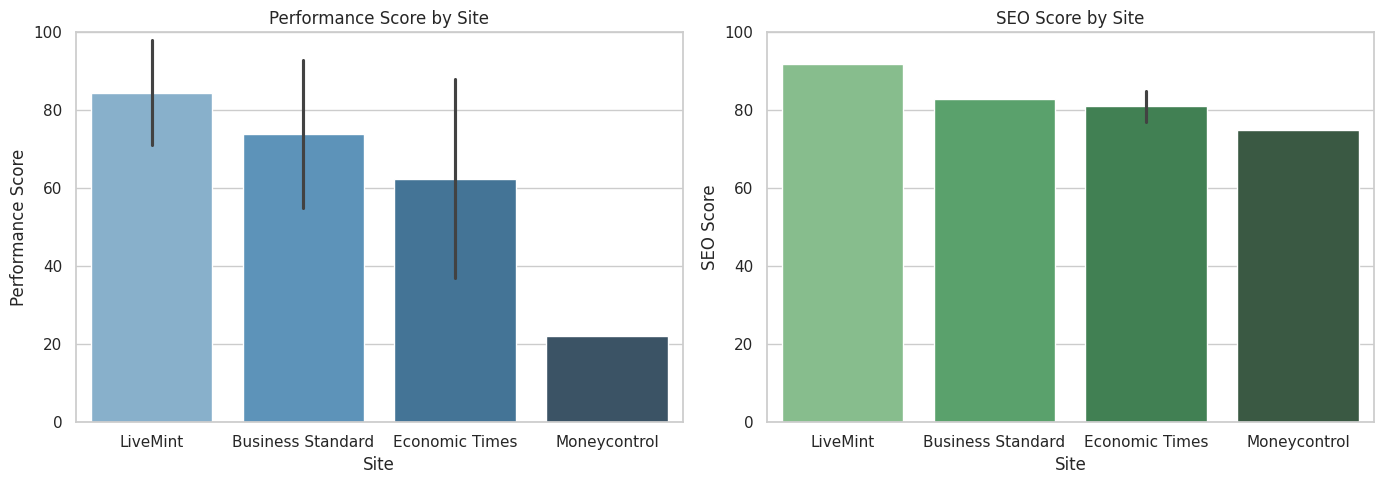

In [11]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=df, x="Site", y="Performance Score", ax=axs[0], palette="Blues_d")
axs[0].set_title("Performance Score by Site")
axs[0].set_ylim(0, 100)

sns.barplot(data=df, x="Site", y="SEO Score", ax=axs[1], palette="Greens_d")
axs[1].set_title("SEO Score by Site")
axs[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()


In [13]:
df[["Site", "Page Size"]]


,Site,Page Size
0,LiveMint,"Total size was 2,360 KiB"
1,Business Standard,"Total size was 2,511 KiB"
2,Economic Times,"Total size was 64,243 KiB"
3,LiveMint,"Total size was 1,587 KiB"
4,Business Standard,"Total size was 2,080 KiB"
5,Economic Times,"Total size was 60,806 KiB"
6,Moneycontrol,"Total size was 7,137 KiB"


In [5]:
def time_to_ms(time_str):
    if pd.isna(time_str):
        return np.nan
    s = time_str.lower().strip()
    if "ms" in s:
        return float(s.replace("ms", "").replace(",", "").strip())
    elif "s" in s:
        return float(s.replace("s", "").replace(",", "").strip()) * 1000
    else:
        return np.nan

In [6]:
df["First Contentful Paint (ms)"] = df["First Contentful Paint"].apply(time_to_ms)
df["Time to Interactive (ms)"] = df["Time to Interactive"].apply(time_to_ms)
df["Speed Index (ms)"] = df["Speed Index"].apply(time_to_ms)
df["Total Blocking Time (ms)"] = df["Total Blocking Time"].apply(time_to_ms)
df["Cumulative Layout Shift"] = pd.to_numeric(df["Cumulative Layout Shift"], errors='coerce')


In [7]:
# Convert scores to numeric if needed
df["Performance Score"] = pd.to_numeric(df["Performance Score"], errors='coerce')
df["SEO Score"] = pd.to_numeric(df["SEO Score"], errors='coerce')


In [8]:
metrics = [
    "Performance Score",
    "SEO Score",
    "First Contentful Paint (ms)",
    "Time to Interactive (ms)",
    "Speed Index (ms)",
    "Total Blocking Time (ms)",
    "Cumulative Layout Shift"
]

/tmp/ipykernel_63542/5997640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Site", y=metric, ax=axs[i], palette="viridis")
/tmp/ipykernel_63542/5997640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Site", y=metric, ax=axs[i], palette="viridis")
/tmp/ipykernel_63542/5997640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Site", y=metric, ax=axs[i], palette="viridis")
/tmp/ipykernel_63542/5997640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed

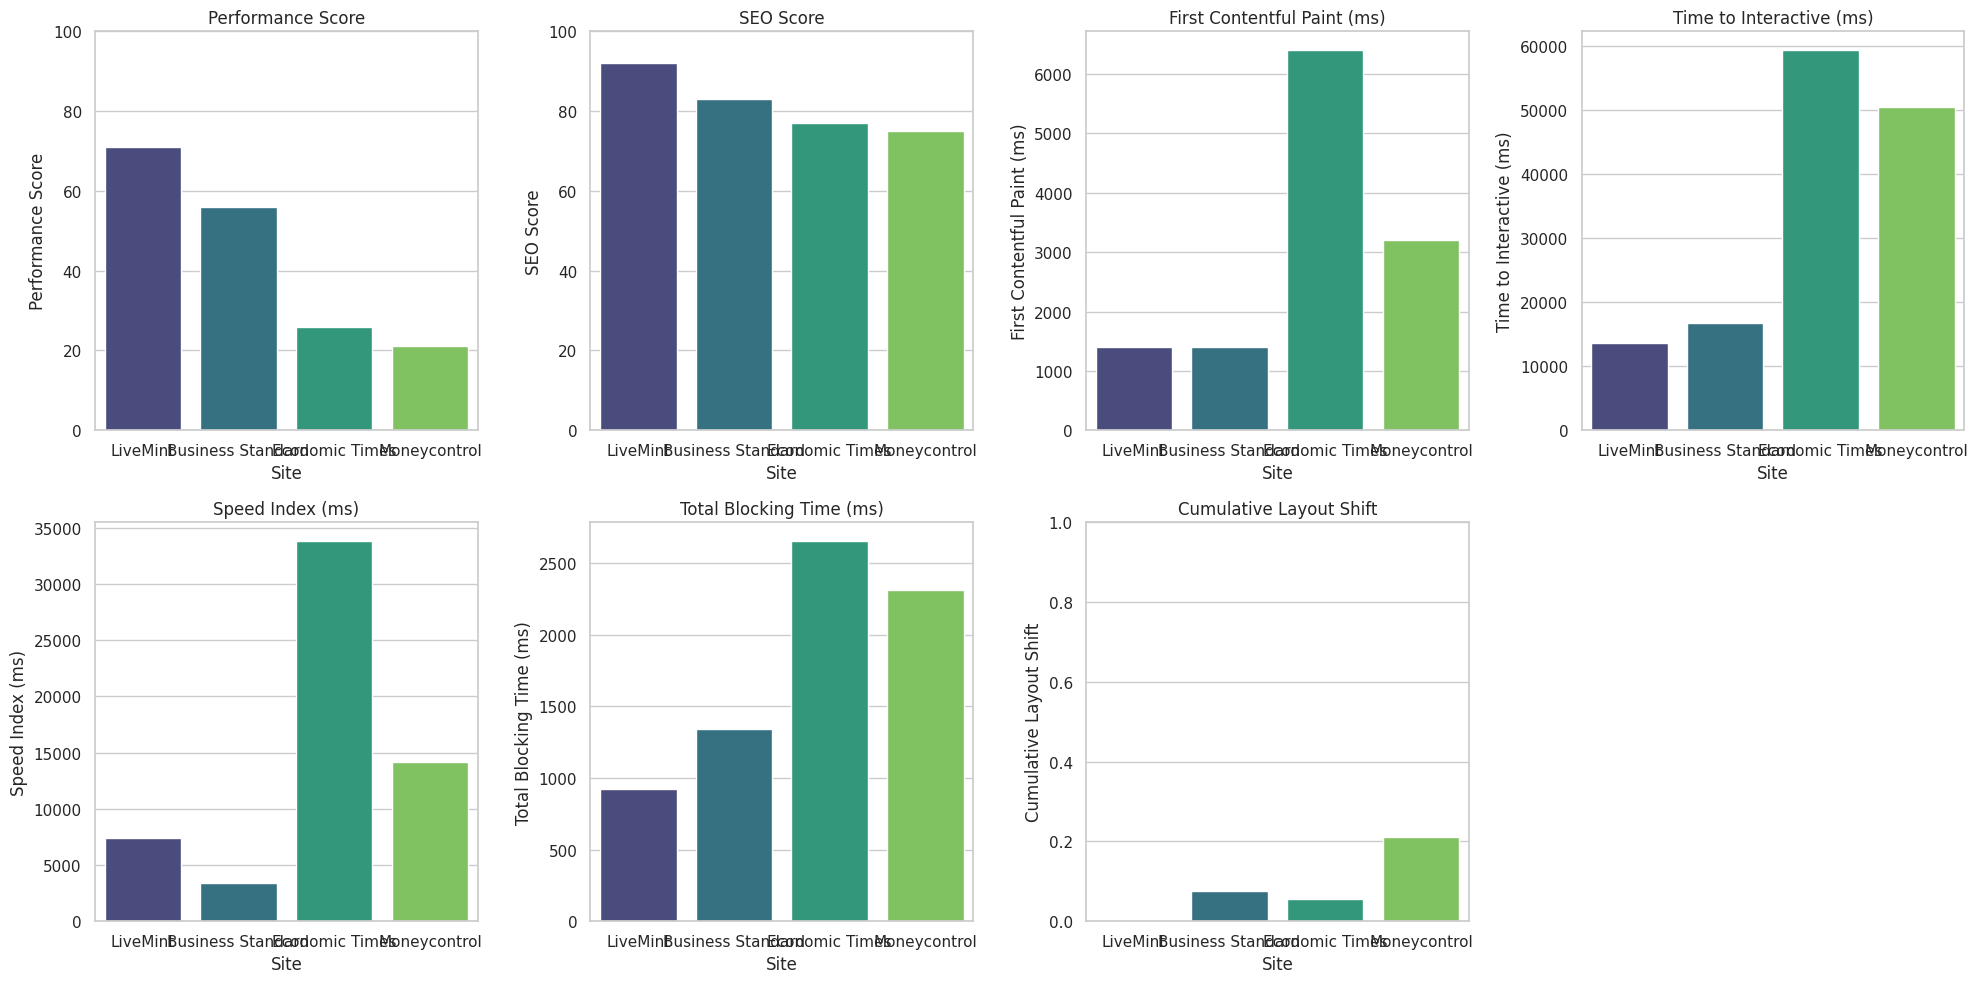

In [13]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, metric in enumerate(metrics):
    sns.barplot(data=df, x="Site", y=metric, ax=axs[i], palette="viridis")
    axs[i].set_title(metric)
    if "Score" in metric:
        axs[i].set_ylim(0, 100)
    elif "Cumulative Layout Shift" in metric:
        axs[i].set_ylim(0, 1)
    else:
        axs[i].set_ylim(0, None)  # auto scale for timings

fig.delaxes(axs[-1])  # remove unused 8th subplot
plt.tight_layout()
plt.show()

| **Metric**                | **What it Measures**                 | **High/Low Better** | **How Calculated**                                |
|---------------------------|--------------------------------------|---------------------|---------------------------------------------------|
| **Performance Score**     | Overall speed & responsiveness       | High                | Weighted aggregate of performance metrics         |
| **SEO Score**             | SEO best practices compliance        | High                | Automated SEO checks (meta tags, links, etc.)     |
| **First Contentful Paint**| Time to first visible content         | Low                 | Browser paint timing events                       |
| **Time to Interactive**   | Time until page is fully interactive | Low                 | Main thread idle detection                        |
| **Speed Index**           | Visual completeness speed            | Low                 | Video frame visual progress analysis              |
| **Total Blocking Time**   | Time main thread is blocked          | Low                 | Sum of long main thread tasks (>50ms)             |
| **Cumulative Layout Shift**| Visual layout stability             | Low                 | Sum of unexpected layout shifts                   |
